In [1]:
from google.colab import drive

In [2]:
drive.mount("mi_carpeta")

Mounted at mi_carpeta


In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('/content/mi_carpeta/MyDrive/Setdatos/card_transdata.csv')

El conjunto de datos contiene las siguientes columnas:

distance_from_home: Distancia desde el hogar.
distance_from_last_transaction: Distancia desde la última transacción.
ratio_to_median_purchase_price: Relación con el precio medio de compra.
repeat_retailer: Indica si el minorista es recurrente.
used_chip: Indica si se utilizó chip.
used_pin_number: Indica si se usó un número PIN.
online_order: Indica si fue una compra en línea.
fraud: Indica si la transacción fue fraudulenta (1) o no (0).

<ipython-input-10-cd0a8eb2cf42>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


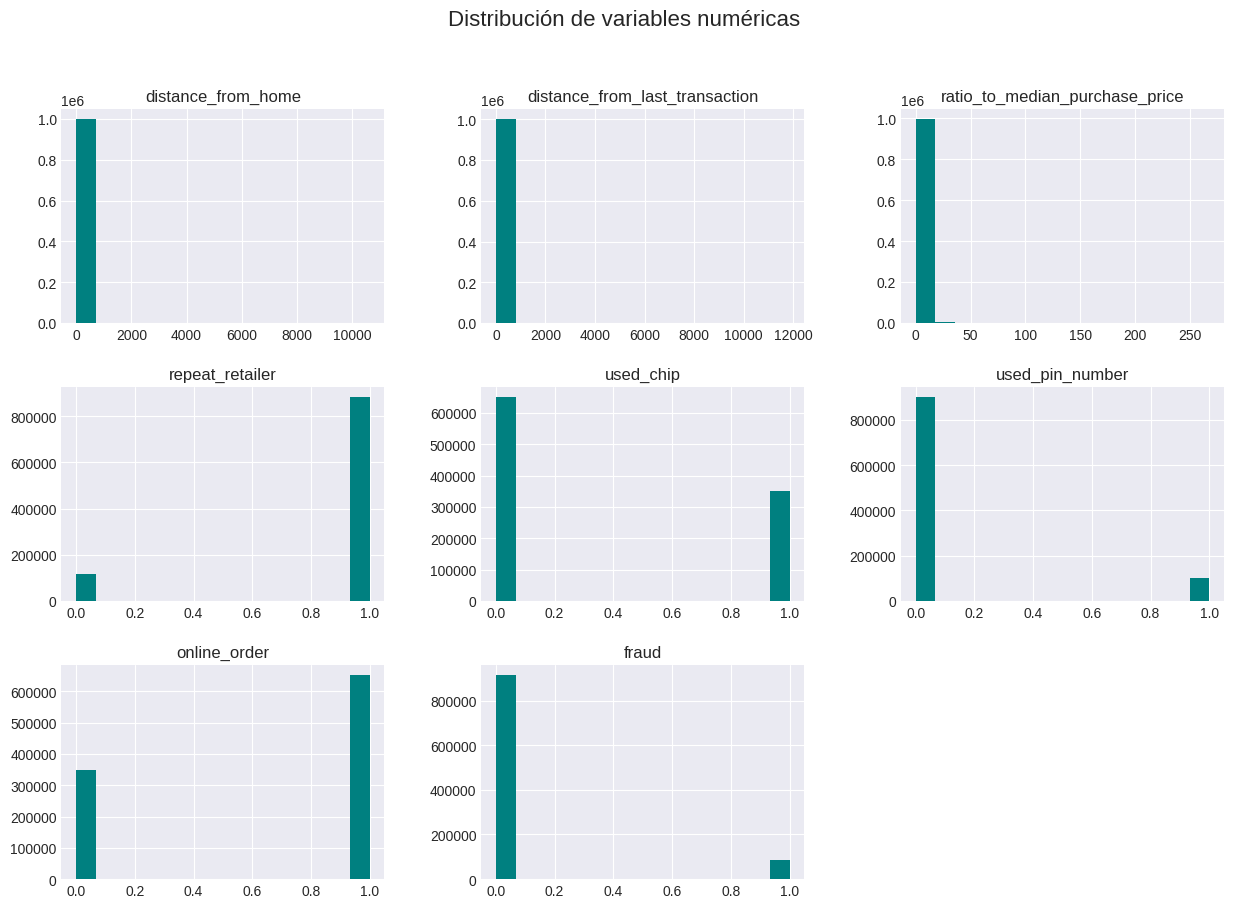

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuraciones generales de los gráficos
plt.style.use('seaborn-darkgrid')

# Gráficos de distribución para variables numéricas
def plot_numeric_distribution(df):
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
    df[numeric_columns].hist(bins=15, figsize=(15, 10), color='teal')
    plt.suptitle('Distribución de variables numéricas', size=16)
    plt.show()

# Gráfico de correlación entre las variables
def plot_correlation_matrix(df):
    plt.figure(figsize=(10, 8))
    corr_matrix = df.corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Matriz de correlación', size=16)
    plt.show()

# Gráfico de conteo de transacciones fraudulentas y no fraudulentas
def plot_fraud_counts(df):
    plt.figure(figsize=(6, 4))
    sns.countplot(x='fraud', data=df, palette=['lightblue', 'salmon'])
    plt.title('Conteo de transacciones fraudulentas vs no fraudulentas', size=16)
    plt.xlabel('Fraude')
    plt.ylabel('Cantidad')
    plt.show()

# Ejecutamos los gráficos
plot_numeric_distribution(df)



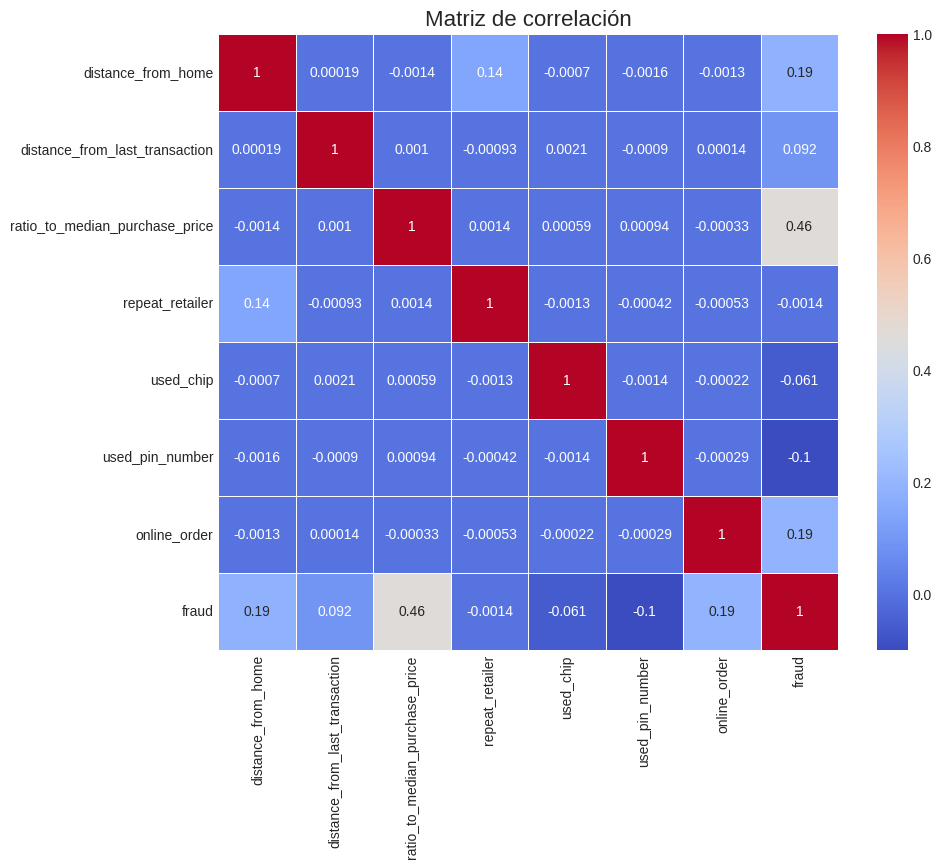

In [8]:
plot_correlation_matrix(df)

<ipython-input-7-271865948ef4>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='fraud', data=df, palette=['lightblue', 'salmon'])


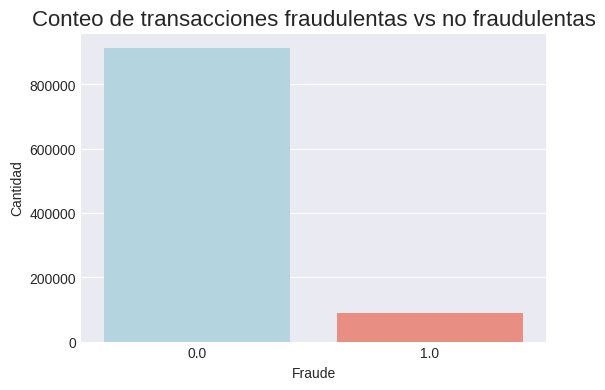

In [9]:
plot_fraud_counts(df)

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separar características (X) y la variable objetivo (y)
X = df.drop(columns=['fraud'])
y = df['fraud']

# Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalizar los datos (es útil para algunos modelos)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Confirmar tamaños de los conjuntos de datos
X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape


((800000, 7), (200000, 7), (800000,), (200000,))

Resultados para Random Forest:

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    182519
         1.0       1.00      1.00      1.00     17481

    accuracy                           1.00    200000
   macro avg       1.00      1.00      1.00    200000
weighted avg       1.00      1.00      1.00    200000

AUC-ROC: 1.0000



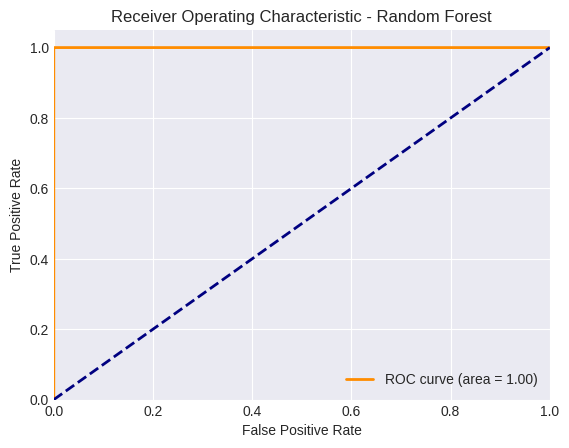

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:55:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Resultados para XGBoost:

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    182519
         1.0       0.99      0.99      0.99     17481

    accuracy                           1.00    200000
   macro avg       0.99      0.99      0.99    200000
weighted avg       1.00      1.00      1.00    200000

AUC-ROC: 1.0000



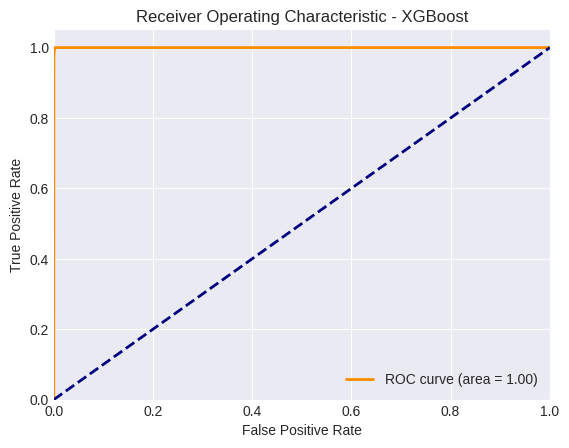

Resultados para Logistic Regression:

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    182519
         1.0       0.90      0.61      0.72     17481

    accuracy                           0.96    200000
   macro avg       0.93      0.80      0.85    200000
weighted avg       0.96      0.96      0.96    200000

AUC-ROC: 0.9670



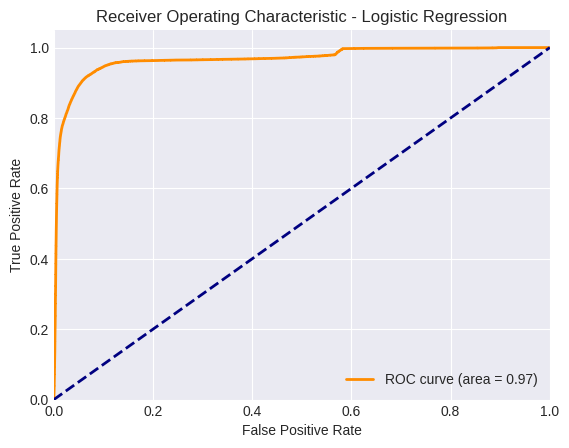

In [13]:
# Importar los modelos y métricas necesarias
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Función para entrenar un modelo y mostrar los resultados
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    # Entrenar el modelo
    model.fit(X_train, y_train)

    # Hacer predicciones
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Para AUC-ROC

    # Mostrar reporte de clasificación
    print(f"Resultados para {model_name}:\n")
    print(classification_report(y_test, y_pred))

    # Calcular AUC-ROC
    auc_score = roc_auc_score(y_test, y_pred_proba)
    print(f"AUC-ROC: {auc_score:.4f}\n")

    # Gráfico de la curva ROC
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic - {model_name}')
    plt.legend(loc="lower right")
    plt.show()

# Modelos a entrenar
models = [
    (RandomForestClassifier(n_estimators=100, random_state=42), "Random Forest"),
    (XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42), "XGBoost"),
    (LogisticRegression(max_iter=1000), "Logistic Regression")
]

# Entrenamiento y evaluación de cada modelo
for model, name in models:
    train_and_evaluate_model(model, X_train_scaled, y_train, X_test_scaled, y_test, name)


Resultados para Logistic Regression con SMOTE:

              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    182519
         1.0       0.58      0.95      0.72     17481

    accuracy                           0.93    200000
   macro avg       0.79      0.94      0.84    200000
weighted avg       0.96      0.93      0.94    200000

AUC-ROC: 0.9795



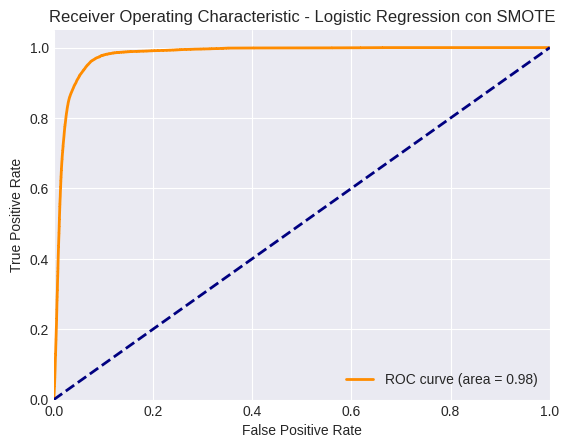

In [14]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression

# Aplicar SMOTE para balancear las clases
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Entrenar el modelo de Regresión Logística con los datos balanceados
logreg_smote = LogisticRegression(max_iter=1000)
train_and_evaluate_model(logreg_smote, X_train_smote, y_train_smote, X_test_scaled, y_test, "Logistic Regression con SMOTE")


Resultados para Random Forest (Regularizado):

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    182519
         1.0       1.00      1.00      1.00     17481

    accuracy                           1.00    200000
   macro avg       1.00      1.00      1.00    200000
weighted avg       1.00      1.00      1.00    200000

AUC-ROC: 1.0000



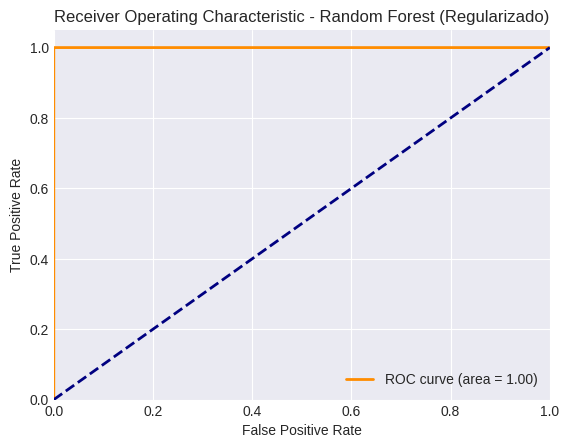

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:00:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Resultados para XGBoost (Regularizado):

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    182519
         1.0       0.99      0.99      0.99     17481

    accuracy                           1.00    200000
   macro avg       1.00      0.99      1.00    200000
weighted avg       1.00      1.00      1.00    200000

AUC-ROC: 1.0000



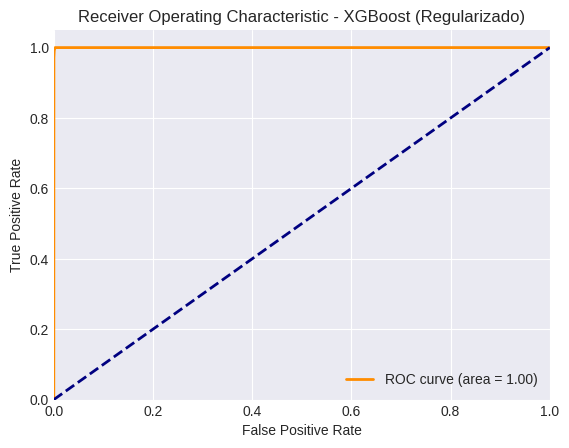

In [15]:
# Ajustar el modelo de Random Forest
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
train_and_evaluate_model(rf_model, X_train_scaled, y_train, X_test_scaled, y_test, "Random Forest (Regularizado)")
# Ajustar el modelo de XGBoost con regularización
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss',
                          max_depth=5, learning_rate=0.1, n_estimators=100, random_state=42)
train_and_evaluate_model(xgb_model, X_train_scaled, y_train, X_test_scaled, y_test, "XGBoost (Regularizado)")
